In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

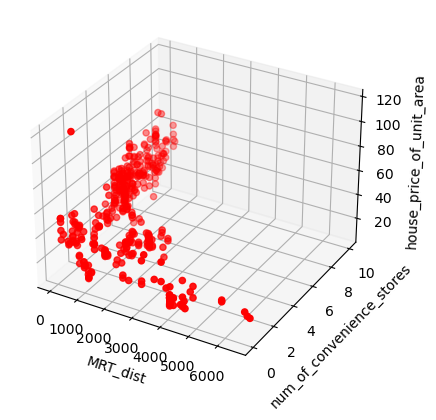

In [4]:
df = pd.read_csv('real_estate.csv')
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['MRT_dist'], df['num_of_convenience_stores'], df['price_of_unit_area'], c='r', marker='o')
ax.set_xlabel('MRT_dist')
ax.set_ylabel('num_of_convenience_stores')
ax.set_zlabel('house_price_of_unit_area')
plt.show()

In [11]:
features = ['MRT_dist', 'num_of_convenience_stores']
target = 'price_of_unit_area'

X, y = df[features].values, df[target].values

In [12]:
def prep_data(X, y):
    # normalize x to have mean=0, std=1
    X = (X - X.mean(axis=0)) / X.std(axis=0) + 1

    # Normalize y to have mean=1, std=1
    y = (y - y.mean()) / y.std() + 1
    return X, y

X, y = prep_data(X, y)

In [13]:
class LinearRegression:
    def __init__(self, learning_rate=0.01, n_iters=1000):
        self.learning_rate = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None
        
    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        
        for _ in range(self.n_iters):
            z = np.dot(X, self.weights) + self.bias
            
            dw = (2 / n_samples) * np.dot(X.T, (z - y))
            db = (2 / n_samples) * np.sum(z - y)
            
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db
            
        
    def predict(self, X):
        return np.dot(X, self.weights) + self.bias
    
    def score(self, X, y):  # R^2 score
        y_pred = self.predict(X)
        u = ((y - y_pred) ** 2).sum()
        v = ((y - y.mean()) ** 2).sum()
        return 1 - u / (v + 1e-10)  # Add small constant to avoid division by zero

In [14]:
model = LinearRegression(learning_rate=0.1, n_iters=1000)
model.fit(X,y)

In [15]:
r_squared = model.score(X, y)

In [16]:
r_squared

0.4965683510508899